In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from ShallowLearn import api_download

In [3]:
from ShallowLearn.api_download import Creds

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon


In [5]:
path = "../Data/coral_watch_ala/data_honduras.xlsx"
df = pd.read_excel(path, sheet_name="CoralWatch Random Survey")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

/home/ziad/miniconda3/envs/ShallowLearn/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
gdf['Observation date'] = pd.to_datetime(gdf['Observation date'])
# gdf['Site Name'].unique()
# gdf_1999 = gdf[gdf['Observation date'] >'1999-06-01']

In [8]:
gdf_2017 = gdf[gdf['Observation date'] >'2017-01-01']

In [11]:
len(gdf_2017['Site Name'].unique())

60

In [5]:
# top_left_y, top_left_x = -14.4626,145.1453
# btm_right_y, btm_right_x = -15.4558,146.1558
# bbox = box(top_left_x, top_left_y, btm_right_x, btm_right_y)

In [39]:
top_left_y, top_left_x = -87.5,16.5
btm_right_y, btm_right_x = -86.5,15.5
bbox = box(top_left_x, top_left_y, btm_right_x, btm_right_y)

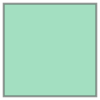

In [40]:
bbox

In [41]:
# gdf_1999 = gdf_1999.cx[bbox.bounds[0]: bbox.bounds[2], bbox.bounds[1]: bbox.bounds[3]]
# gdf_1999 = gdf_1999.set_crs('EPSG:4326')

In [42]:
gdf_1999['Observation date'].unique()

NameError: name 'gdf_1999' is not defined

In [43]:
creds = Creds()

In [44]:
# # Instantiate the Sentinel-2 downloader and search for products
sentinel_downloader = api_download.SentinelSatDownload(creds.sentinel_username, creds.sentinel_password)



In [45]:
products = sentinel_downloader.download(bbox, ['20150101', '20231231'], [0, 100])

In [46]:
products

In [ ]:
    # Create a bounding box around the location (approx. 1 degree in each direction)
    #bbox = f"POLYGON(({london_lon - 1} {london_lat - 1}, {london_lon - 1} {london_lat + 1}, {london_lon + 1} {london_lat + 1}, {london_lon + 1} {london_lat - 1}, {london_lon - 1} {london_lat - 1}))"
    
    sentinel_products = sentinel_downloader.download(bbox, [start_date, end_date], [min_cloud_cover_sentinel, max_cloud_cover_sentinel])
    print("Sentinel-2 products:", sentinel_products)

In [31]:
import geojson

def bbox_to_geojson(bbox):
    polygon = geojson.Polygon([[
        (bbox[0], bbox[1]),
        (bbox[2], bbox[1]),
        (bbox[2], bbox[3]),
        (bbox[0], bbox[3]),
        (bbox[0], bbox[1])
    ]])

    feature = geojson.Feature(geometry=polygon)
    feature_collection = geojson.FeatureCollection([feature])

    return geojson.dumps(feature_collection, indent=2)

In [32]:
with open("../Data/Aus_reefs.geojson", "w") as f:
    f.write(bbox_to_geojson(bbox.bounds))

In [33]:
json_path = "/home/ziad/Documents/Github/ShallowLearn/Data/Aus_reefs.geojson"

In [35]:
sat_dict = {
    "Landsat 5 TM Collection 2 Level 2": "landsat_tm_c2_l2",
    "Landsat 7 ETM+ Collection 2 Level 2": "landsat_etm_c2_l2",
    "Landsat 8 Collection 2 Level 2": "landsat_ot_c2_l2",
    "Landsat 9 Collection 2 Level 2": "landsat_ot_c2_l2"
}

In [36]:
landsat_7 = "landsat_etm_c2_l2"

In [39]:
query = api_download.LandSatDownload(Creds.sentinel_username, Creds.landsat_password)

In [42]:
data_query = query.download_from_json(landsat_7, json_path, ["1999-06-01", "2017-06-30"], 30)

{"features": [{"geometry": {"coordinates": [[[145.1453, -15.4558], [146.1558, -15.4558], [146.1558, -14.4626], [145.1453, -14.4626], [145.1453, -15.4558]]], "type": "Polygon"}, "properties": {}, "type": "Feature"}], "type": "FeatureCollection"}


In [50]:
counter = 0
for val in data_query:
    if val['scan_line_corrector'] == 'OFF':
        print(counter)
        counter += 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [46]:
from landsatxplore.earthexplorer import EarthExplorer

ee = EarthExplorer(Creds.sentinel_username, Creds.landsat_password)



In [47]:
ee.download('LE70950712017179ASA00', output_dir='../Data/')



Download failed with dataset id 1 of 2. Re-trying with the next one.


230MB [00:07, 31.3MB/s]                            


'../Data/LE07_L1GT_095071_20170628_20200831_02_T2.tar'

In [ ]:
ee.logout()